# Titanic Kaggle Dataset
*This data is acquired from the Titanic Kaggle Dataset.*


Based on this data, I tried to predict the survavibility of the Titanic Passenger based on the variable that is available and collect the insights that can be acquired from the data.

------------------------------------
The data can be acquired here:
https://www.kaggle.com/c/titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test[['PassengerId']]

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#creating function to clean the missing value
def clean(data):
    #dropping unused columns
    data.drop(columns=['Name','Ticket','Fare','Cabin'], axis = 1, inplace=True)
    
    #filling missing values of number
    num_col = ['Age','SibSp','Parch']
    avg_val = data[num_col].mean()
    data['Age'].fillna(avg_val['Age'], inplace=True)
    
    #filling Embarked values
    data.Embarked.fillna("X", inplace=True)
    return data

In [7]:
data = clean(data)
test = clean(test)

In [8]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.000000,1,0,S
1,2,1,1,female,38.000000,1,0,C
2,3,1,3,female,26.000000,0,0,S
3,4,1,1,female,35.000000,1,0,S
4,5,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,S
887,888,1,1,female,19.000000,0,0,S
888,889,0,3,female,29.699118,1,2,S
889,890,1,1,male,26.000000,0,0,C


------------------------------------
# Gender distribution
#### Based on the data collected, the majority of the Titanic passenger is dominated by the **Male gender**.

- Here, we can see the distribution amount of Male and Female passenger of Titanic.

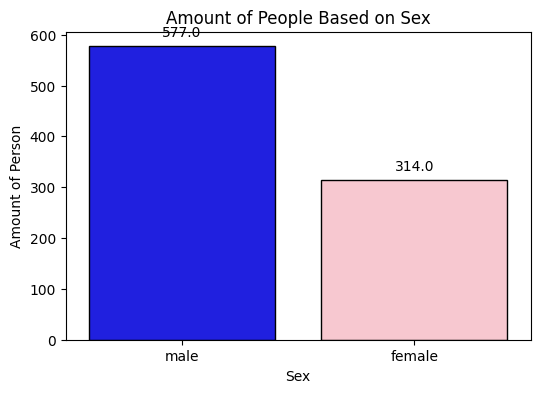

In [9]:
#vizualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

colors = {'male': 'blue', 'female': 'pink'}
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sex', data=data, palette=[colors[sex] for sex in data['Sex']], edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Sex")
plt.ylabel("Amount of Person")
plt.title("Amount of People Based on Sex")

plt.show()

### Based on the Gender Distribution for the passenger, **The Titanic passenger is dominated with Male with the amount of 577 people.**

------------------------------------
# Passenger Age distribution
### Based on the data Collected, the oldest Titanic passenger is 80 years old.
- The passenger is separated into 4 different label based on the Age difference. The label would be:
    - Children = People with age under 10 Years Old.
    - Teenager = People with the age of 11 until 22 Years Old.
    - Adult = People with the age of 22 until 50 Years Old.
    - Elderly = People with the age above 50 Years Old.

In [10]:
print(data['Age'].max())

80.0


In [11]:
for_viz = data

In [12]:
def age_label(data):
    if data['Age'] <= 10:
        return 'Children'
    elif 10 < data['Age'] <= 22:
        return 'Teenager'
    elif 22 < data['Age'] <= 50:
        return 'Adult'
    else:
        return 'Elderly'

for_viz['age_label'] = for_viz.apply(age_label, axis=1)

In [13]:
for_viz

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,age_label
0,1,0,3,male,22.000000,1,0,S,Teenager
1,2,1,1,female,38.000000,1,0,C,Adult
2,3,1,3,female,26.000000,0,0,S,Adult
3,4,1,1,female,35.000000,1,0,S,Adult
4,5,0,3,male,35.000000,0,0,S,Adult
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,S,Adult
887,888,1,1,female,19.000000,0,0,S,Teenager
888,889,0,3,female,29.699118,1,2,S,Adult
889,890,1,1,male,26.000000,0,0,C,Adult


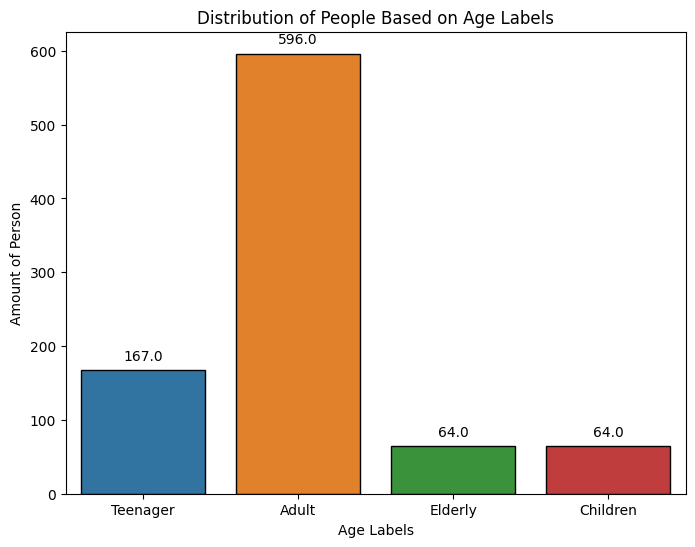

In [14]:
#vizualizing the age distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='age_label', data=for_viz, edgecolor='black')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Age Labels")
plt.ylabel("Amount of Person")
plt.title("Distribution of People Based on Age Labels")
plt.show()

### Based on the Age Labels for the passenger, **The Titanic passenger is dominated with Adult people with the amount of 596 people.**

------------------------------------

In [15]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

------------------------------------
# Convertion into number

Because logistic regression algorithm needs number value to process the data, we need to convert the string values into number.

The way to do it is with using **Label Encoder** to convert the categorical value into number.

In [16]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

#function to convert categorical label into number
colz = ['Sex','Embarked']

def numbering(data):
    for col in colz:
        data[col] = LE.fit_transform(data[col])
        print(LE.classes_)
        
    return data

In [17]:
data = numbering(data)
test = numbering(test)

['female' 'male']
['C' 'Q' 'S' 'X']
['female' 'male']
['C' 'Q' 'S']


In [18]:
data = data.drop(columns=['age_label'], axis = 1)

------------------------------------
# Correlation map using Heatmap

In this part, Heatmap will be used to understand the correlation between each variables from the data on the survivability of the passenger.

In [19]:
affect = data.drop(columns=['PassengerId'], axis = 1)

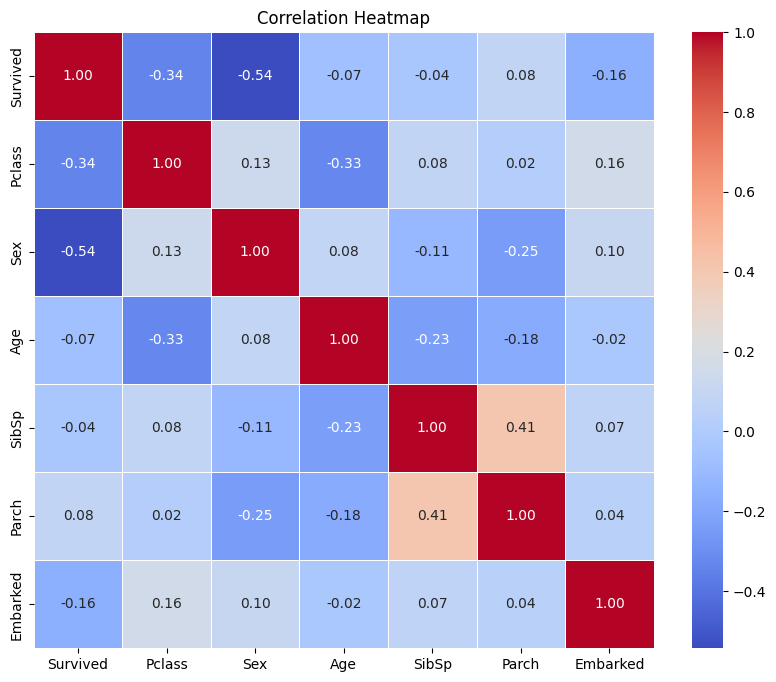

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = affect.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

# Correlation Result

Based on the correlation between the data, there are several insights that's gathered:

- There is a weak positive correlation between **"Sex"** and **"Survived"**. This means that women were slightly more likely to survive than men.
- There is a weak negative correlation between **"SibSp"** (number of siblings/spouses aboard) and **"Survived"**. This means that people who were traveling with family were slightly less likely to survive.
- There is a weak positive correlation between **"Parch"** (number of parents/children aboard) and **"Survived"**. This means that people who were traveling with children were slightly more likely to survive.
- There is a weak negative correlation between **"Embarked"** and **"Survived"**. This means that people who embarked from C were slightly more likely to survive than people who embarked from S or Q.

------------------------------------

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
y = data['Survived']
X = data.drop(columns=['Survived'], axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [24]:
model = LogisticRegression(max_iter=1000, random_state=42)

In [25]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [26]:
pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
#showing the accuracy score of the model
accuracy_score(y_test, pred)

0.8097014925373134

In [29]:
predictions = model.predict(test)

In [30]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
df = pd.DataFrame({
    "PassengerId": test_id['PassengerId'],
    "Survived": predictions
})

In [32]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
df.to_csv('submission.csv', index=False)